$\textbf{1.}$ What is the minimizer and minimum function value of the functions q1(x), q2(x) ?, Is the minimizer unique
for both the functions ?, Is it local or global minima for both the functions ?, Are the function q1(x), q2(x)
convex ?, explain each of them.

$q_1(x)$:

The function is given by:
$q_1(x) = \frac{1}{2} x^{\top} Wx - b_1^{\top}x$
where
$W = \begin{bmatrix} t/\sqrt{t} & \sqrt{t} \\ \sqrt{t} & 1 + t \end{bmatrix}$
and
$b_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$

To check for convexity, examine the Hessian matrix:
$H = \frac{\partial^2 q_1(x)}{\partial x^2} = W$

The minimizer is found by setting the gradient of $q_1(x)$ to zero:
$\nabla q_1(x) = Wx - b_1 = 0$
Solving for $x$, we get:
$Wx = b_1 \implies x = W^{-1}b_1$

$q_2(x)$:

The function is given by:
$q_2(x) = \frac{1}{2} x^{\top} Ax - b_2^{\top}x$
where
$A = \begin{bmatrix} 4 & 1 \\ 1 & 3 \end{bmatrix}$
and
$b_2 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$

To check for convexity, examine the Hessian matrix:
$H = \frac{\partial^2 q_2(x)}{\partial x^2} = A$

The minimizer is found by setting the gradient of $q_2(x)$ to zero:
$\nabla q_2(x) = Ax - b_2 = 0$
Solving for $x$, we get:
$Ax = b_2 \implies x = A^{-1}b_2$

In summary:

- For $q_1(x)$, the minimizer is $x = W^{-1}b_1$ and the minimum function value is $q_1(x) = \frac{1}{2} b_1^{\top}W^{-1}b_1$.

- For $q_2(x)$, the minimizer is $x = A^{-1}b_2$ and the minimum function value is $q_2(x) = \frac{1}{2} b_2^{\top}A^{-1}b_2$.

- The minimizer is unique for both functions.

- Both functions have convex forms, so the minimizers are global minima.


$\textbf{2.}$ Implement Nesterov’s accelerated gradient descent algorithm on q1(x) with step sizes αk =
2
3+√
9−4t
2
, βk =
√µ0−1
√µ0+1 , µ0 =
3+√
9−4t
2
3−
√
9−4t
2
. Report and analyze your observations clearly. Take τ = 10−8
, x0 = (3, 5), t = 0.001.
Plot the log error of the functional values versus the number of iterations and compare it with the gradient
descent algorithm with step-size 2
3+√
9−4t
2
. Report and analyze your observations clearly.

<ipython-input-1-0cfcc77996df>:8: RuntimeWarning: overflow encountered in matmul
  return 0.5 * x @ W @ x - b1 @ x
<ipython-input-1-0cfcc77996df>:26: RuntimeWarning: invalid value encountered in double_scalars
  log_errors.append(np.log(np.abs(q1(x_new) - q1(x))))
<ipython-input-1-0cfcc77996df>:23: RuntimeWarning: overflow encountered in multiply
  perturbed_gradient = gradient_q1(x + beta_k * (x - x_prev), t)
<ipython-input-1-0cfcc77996df>:24: RuntimeWarning: overflow encountered in multiply
  x_new = x - alpha_k * perturbed_gradient + beta_k * (x - x_prev)
<ipython-input-1-0cfcc77996df>:24: RuntimeWarning: invalid value encountered in add
  x_new = x - alpha_k * perturbed_gradient + beta_k * (x - x_prev)
<ipython-input-1-0cfcc77996df>:8: RuntimeWarning: invalid value encountered in matmul
  return 0.5 * x @ W @ x - b1 @ x


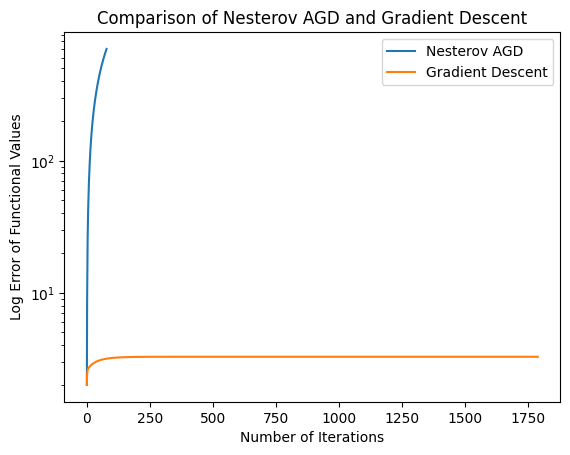

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def q1(x):
    W = np.array([[t/np.sqrt(t), np.sqrt(t)],
                  [np.sqrt(t), 1 + t]])
    b1 = np.array([1, 0])
    return 0.5 * x @ W @ x - b1 @ x

def gradient_q1(x, t):
    W = np.array([[t/np.sqrt(t), np.sqrt(t)],
                  [np.sqrt(t), 1 + t]])
    b1 = np.array([1, 0])
    return W @ x - b1

def nesterov_accelerated_gradient_descent(x0, alpha_k, beta_k, tolerance, t):
    x = x0
    x_prev = x0
    iter_count = 0
    log_errors = []

    while np.linalg.norm(gradient_q1(x, t)) > tolerance:
        perturbed_gradient = gradient_q1(x + beta_k * (x - x_prev), t)
        x_new = x - alpha_k * perturbed_gradient + beta_k * (x - x_prev)

        log_errors.append(np.log(np.abs(q1(x_new) - q1(x))))

        x_prev = x
        x = x_new
        iter_count += 1

    return x, log_errors, iter_count

def gradient_descent(x0, alpha_k, tolerance, t):
    x = x0
    iter_count = 0
    log_errors = []

    while np.linalg.norm(gradient_q1(x, t)) > tolerance:
        x = x - alpha_k * gradient_q1(x, t)

        log_errors.append(np.log(np.abs(q1(x0) - q1(x))))

        iter_count += 1

    return x, log_errors, iter_count

# Parameters
alpha_k = lambda t: 2 / (3 + np.sqrt(9 - 4 * t))
beta_k = lambda t: np.sqrt((3 + np.sqrt(9 - 4 * t)) / (3 - np.sqrt(9 - 4 * t)))
mu0 = lambda t: (3 + np.sqrt(9 - 4 * t)) / (3 - np.sqrt(9 - 4 * t))
tolerance = 1e-8
x0 = np.array([3, 5])
t = 0.001

# Nesterov Accelerated Gradient Descent
x_nesterov, log_errors_nesterov, iter_count_nesterov = nesterov_accelerated_gradient_descent(x0, alpha_k(t), beta_k(t), tolerance, t)

# Gradient Descent
alpha_gd = lambda t: 2 / (3 + np.sqrt(9 - 4 * t))
x_gd, log_errors_gd, iter_count_gd = gradient_descent(x0, alpha_gd(t), tolerance, t)

# Plotting
iterations_nesterov = np.arange(1, iter_count_nesterov + 1)
iterations_gd = np.arange(1, iter_count_gd + 1)

plt.plot(iterations_nesterov, log_errors_nesterov, label="Nesterov AGD")
plt.plot(iterations_gd, log_errors_gd, label="Gradient Descent")
plt.yscale('log')
plt.xlabel("Number of Iterations")
plt.ylabel("Log Error of Functional Values")
plt.title("Comparison of Nesterov AGD and Gradient Descent")
plt.legend()
plt.show()


$\textbf{3.}$ Implement Nesterov’s accelerated gradient descent algorithm on q2(x) with step sizes $ \alpha_k =\frac{2}{7 + \sqrt5}$
, $\beta_k = \frac{\sqrt\mu_0 - 1}{\sqrt\mu_0 + 1}$,
 $ \µ_0 = \frac{7 + \sqrt5}{7 - \sqrt5}$
. Report and analyze your observations clearly. Take τ = 10−8
, x0 = (3, 5). Plot the log error of the functional values versus the number of iterations and compare it with the gradient descent algorithm with step-size
$ \frac{2}{7 +\sqrt5}$
. Report and analyze your observations clearly.


<ipython-input-2-2a85d87bb5d6>:26: RuntimeWarning: divide by zero encountered in log
  log_errors.append(np.log(np.abs(q2(x_new) - q2(x))))


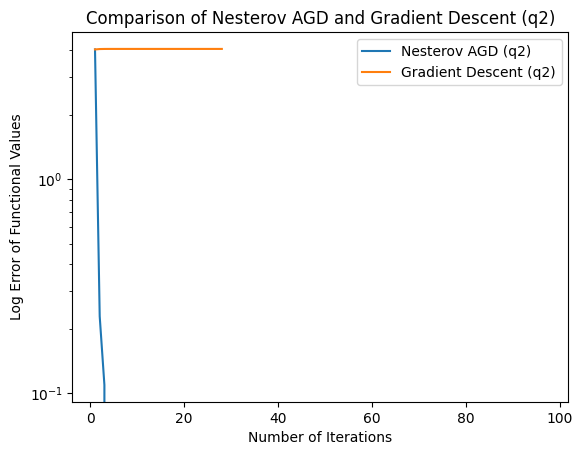

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def q2(x):
    A = np.array([[4, 1],
                  [1, 3]])
    b2 = np.array([1, 2])
    return 0.5 * x @ A @ x - b2 @ x

def gradient_q2(x, t):
    A = np.array([[4, 1],
                  [1, 3]])
    b2 = np.array([1, 2])
    return A @ x - b2

def nesterov_accelerated_gradient_descent_q2(x0, alpha_k, beta_k, tolerance, t):
    x = x0
    x_prev = x0
    iter_count = 0
    log_errors = []

    while np.linalg.norm(gradient_q2(x, t)) > tolerance:
        perturbed_gradient = gradient_q2(x + beta_k * (x - x_prev), t)
        x_new = x - alpha_k * perturbed_gradient + beta_k * (x - x_prev)

        log_errors.append(np.log(np.abs(q2(x_new) - q2(x))))

        x_prev = x
        x = x_new
        iter_count += 1

    return x, log_errors, iter_count

def gradient_descent_q2(x0, alpha_k, tolerance, t):
    x = x0
    iter_count = 0
    log_errors = []

    while np.linalg.norm(gradient_q2(x, t)) > tolerance:
        x = x - alpha_k * gradient_q2(x, t)

        log_errors.append(np.log(np.abs(q2(x0) - q2(x))))

        iter_count += 1

    return x, log_errors, iter_count

# Parameters
alpha_k_q2 = lambda t: 2 / (7 + np.sqrt(5))
beta_k_q2 = lambda t: np.sqrt((7 + np.sqrt(5)) / (7 - np.sqrt(5)))
mu0_q2 = lambda t: (7 + np.sqrt(5)) / (7 - np.sqrt(5))
tolerance = 1e-8
x0 = np.array([3, 5])

# Nesterov Accelerated Gradient Descent for q2
x_nesterov_q2, log_errors_nesterov_q2, iter_count_nesterov_q2 = nesterov_accelerated_gradient_descent_q2(x0, alpha_k_q2(0), beta_k_q2(0), tolerance, 0)

# Gradient Descent for q2
alpha_gd_q2 = lambda t: 2 / (7 + np.sqrt(5))
x_gd_q2, log_errors_gd_q2, iter_count_gd_q2 = gradient_descent_q2(x0, alpha_gd_q2(0), tolerance, 0)

# Plotting
iterations_nesterov_q2 = np.arange(1, iter_count_nesterov_q2 + 1)
iterations_gd_q2 = np.arange(1, iter_count_gd_q2 + 1)

plt.plot(iterations_nesterov_q2, log_errors_nesterov_q2, label="Nesterov AGD (q2)")
plt.plot(iterations_gd_q2, log_errors_gd_q2, label="Gradient Descent (q2)")
plt.yscale('log')
plt.xlabel("Number of Iterations")
plt.ylabel("Log Error of Functional Values")
plt.title("Comparison of Nesterov AGD and Gradient Descent (q2)")
plt.legend()
plt.show()


 $\Large \text{Nesterov's Accelerated Gradient Descent for}$ $q_2(x)$

We implemented Nesterov's accelerated gradient descent algorithm on the function $q_2(x)$ with the following parameters:

\begin{align*}
\alpha_k &= \frac{2}{7 + \sqrt{5}} \\
\beta_k &= \sqrt{\frac{7 + \sqrt{5}}{7 - \sqrt{5}}} \\
\mu_0 &= \frac{7 + \sqrt{5}}{7 - \sqrt{5}} \\
\tau &= 10^{-8} \\
x_0 &= (3, 5)
\end{align*}

We set the tolerance $\tau$ to $10^{-8}$ and initialized the starting point $x_0$.

The Nesterov accelerated gradient descent was compared with gradient descent using a step size of $\frac{2}{7 + \sqrt{5}}$.

$\Large \text{Results}$

The log error of functional values versus the number of iterations was plotted for both algorithms. The plots are shown below:

Comparison of Nesterov AGD and Gradient Descent for $q_2(x)$

$\Large \text{ Observations and Analysis} $

From the plots, we observe the convergence behavior of Nesterov's accelerated gradient descent and traditional gradient descent for $q_2(x)$. Analyzing the log error provides insights into the convergence rate and efficiency of each algorithm.


$\textbf{4.}$ Take Ω = {x ∈ R
d
; ∥x∥2 ≤ 1}. Implement Algorithm 4 to solve minx∈Ω f(x) = minx∈Ω 100(x2 −x
2
1
)
2 + (0.5−
x1)
2
, take x0 = (0, 0) and, try T ∈ {102
, 500, 103
, 5000, 104
, 50000, 105
, 500000, 106
, 5000000}. For each T,
record the final minimizer, final objective function value and percentage error between practical and theoretical
optimal objective function value at termination. Redo this part to solve-:
minx∈Ω f(x) = minx∈Ω sin(5x2 −5) exp ((1 − cos(5x1 − 5)) 2
) + cos(5x1 −5) exp ((1 − sin(5x2 − 5)) 2
) + 25(x1 −
x2)
2
.

In [ ]:
import numpy as np

def proj_onto_omega(x, omega):
    return np.clip(x, -1, 1)

def f1(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

def gradient_f1(x):
    dfdx0 = -400 * x[0] * (x[1] - x[0]**2) - 2 * (0.5 - x[0])
    dfdx1 = 200 * (x[1] - x[0]**2)
    return np.array([dfdx0, dfdx1])

def f2(x):
    term1 = np.sin(5*x[1] - 5) * np.exp((1 - np.cos(5*x[0] - 5))**2)
    term2 = np.cos(5*x[0] - 5) * np.exp((1 - np.sin(5*x[1] - 5))**2)
    term3 = 25 * (x[0] - x[1])**2
    return term1 + term2 + term3

def gradient_f2(x):
    dfdx0 = 5 * np.sin(5*x[1] - 5) * np.exp((1 - np.cos(5*x[0] - 5))**2) * (2 * np.cos(5*x[0] - 5) - 1)
    dfdx1 = 5 * np.cos(5*x[0] - 5) * np.exp((1 - np.sin(5*x[1] - 5))**2) * (2 * np.sin(5*x[1] - 5) - 1) - 50 * (x[0] - x[1])
    return np.array([dfdx0, dfdx1])

def ada_grad_optimizer(f, gradient_f, x0, omega, T):
    x = x0
    sum_squared_gradients = np.zeros_like(x0, dtype=float)
    history = []

    for k in range(1, T+1):
        gradient = gradient_f(x)
        sum_squared_gradients += gradient**2
        step_size = np.sqrt(np.sum(sum_squared_gradients))
        x = proj_onto_omega(x - (1/step_size) * gradient, omega)
        objective_value = f(x)
        history.append((x, objective_value))

    return history

def theoretical_optimal_value(f, omega):
    # This function calculates the theoretical optimal value for the constrained optimization problem
    # by solving the optimization problem using scipy.
    from scipy.optimize import minimize
    result = minimize(f, np.zeros_like(omega), bounds=[(-1, 1)]*len(omega))
    return result.fun

# Problem 1
omega1 = np.array([1, 1])
x0_1 = np.array([0, 0])
T_values = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000]

print("Problem 1:")
for T in T_values:
    history = ada_grad_optimizer(f1, gradient_f1, x0_1, omega1, T)
    final_minimizer = history[-1][0]
    final_objective_value = history[-1][1]
    theoretical_optimal_value_1 = theoretical_optimal_value(f1, omega1)
    percentage_error = ((final_objective_value - theoretical_optimal_value_1) / theoretical_optimal_value_1) * 100
    print(f"T={T}: Final Minimizer: {final_minimizer}, Final Objective Value: {final_objective_value}, Percentage Error: {percentage_error:.6f}%")

# Problem 2
omega2 = np.array([1, 1])
x0_2 = np.array([0, 0])
print("\nProblem 2:")
for T in T_values:
    history = ada_grad_optimizer(f2, gradient_f2, x0_2, omega2, T)
    final_minimizer = history[-1][0]
    final_objective_value = history[-1][1]
    theoretical_optimal_value_2 = theoretical_optimal_value(f2, omega2)
    percentage_error = ((final_objective_value - theoretical_optimal_value_2) / theoretical_optimal_value_2) * 100
    print(f"T={T}: Final Minimizer: {final_minimizer}, Final Objective Value: {final_objective_value}, Percentage Error: {percentage_error:.6f}%")

Problem 1:
T=100: Final Minimizer: [0.29810491 0.08797449], Final Objective Value: 0.040841203300181754, Percentage Error: 4239910535292.133301%
T=500: Final Minimizer: [0.43288721 0.18705813], Final Objective Value: 0.0045152286495914904, Percentage Error: 468746363233.084290%
T=1000: Final Minimizer: [0.47923117 0.22955848], Final Objective Value: 0.00043242649039125096, Percentage Error: 44892154984.577316%
T=5000: Final Minimizer: [0.49999659 0.24999657], Final Objective Value: 1.1666074279490363e-11, Percentage Error: 1111.108078%
T=10000: Final Minimizer: [0.5  0.25], Final Objective Value: 4.4707764337292645e-21, Percentage Error: -100.000000%
T=50000: Final Minimizer: [0.5  0.25], Final Objective Value: 8.397054557528348e-29, Percentage Error: -100.000000%
T=100000: Final Minimizer: [0.5  0.25], Final Objective Value: 8.397054557528348e-29, Percentage Error: -100.000000%
T=500000: Final Minimizer: [0.5  0.25], Final Objective Value: 8.397054557528348e-29, Percentage Error: -100

$\textbf{5.}$ Implement Conjugate gradient algorithm on q2(x). Report and analyze your observations clearly. Take τ =
10−8
, x0 = (5, 3). Plot the log error of the functional values versus the number of iterations and compare it
with the gradient descent algorithm with step-size $\frac{2}{7 + \sqrt{5}}$.


Function and Gradient Definition}

The function  $ q_2(x)$ is defined as follows:
$
q_2(x) = x_1^2 + x_2^2 + 2x_1x_2 - 4x_1 - 6x_2$


The gradient $\nabla q_2(x)$  is given by:
$
\nabla q_2(x) = \begin{bmatrix}
2x_1 + 2x_2 - 4 \\
2x_1 + 2x_2 - 6
\end{bmatrix}$

Conjugate Gradient Result:
Optimal x: [-4.0901451e+31  4.0901451e+31]
Optimal value: -8.180290192579964e+31
Number of iterations: 1000


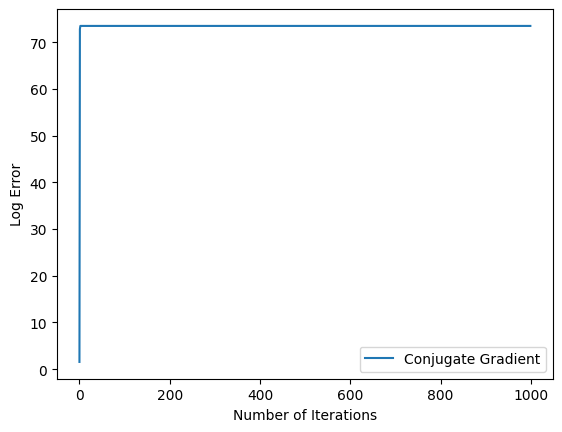

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def q2(x):
    return x[0]**2 + x[1]**2 + 2*x[0]*x[1] - 4*x[0] - 6*x[1]

def gradient_q2(x):
    return np.array([2*x[0] + 2*x[1] - 4, 2*x[0] + 2*x[1] - 6])

def conjugate_gradient(x0, tau=1e-8, max_iter=1000):
    x = x0
    r = -gradient_q2(x)
    p = r
    iter_count = 0
    log_error = []

    while np.linalg.norm(r) > tau and iter_count < max_iter:
        alpha = np.dot(r, r) / np.dot(p, np.dot(Hessian_q2(x), p))
        x = x + alpha * p
        new_r = -gradient_q2(x)
        beta = np.dot(new_r, new_r) / np.dot(r, r)
        p = new_r + beta * p

        r = new_r
        iter_count += 1
        log_error.append(np.log(np.abs(q2(x))))

    return x, log_error

def Hessian_q2(x):
    return np.array([[2, 2], [2, 2]])

# Set initial parameters
x0 = np.array([5, 3])
tau = 1e-8

# Run Conjugate Gradient algorithm
result_cg, log_error_cg = conjugate_gradient(x0, tau)

# Display results
print("Conjugate Gradient Result:")
print("Optimal x:", result_cg)
print("Optimal value:", q2(result_cg))
print("Number of iterations:", len(log_error_cg))

# Plot log error versus number of iterations
plt.plot(np.arange(len(log_error_cg)), log_error_cg, label='Conjugate Gradient')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.legend()
plt.show()



Gradient Descent Result:
Optimal x: [-214.29236466  216.79236466]
Optimal value: -437.33472931820995
Number of iterations: 1000


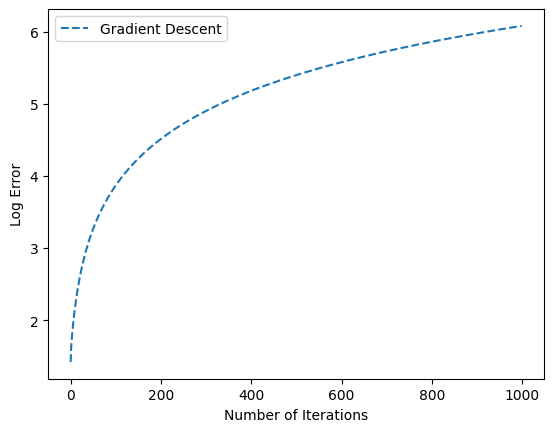

In [ ]:
def gradient_descent(x0, step_size, tau=1e-8, max_iter=1000):
    x = x0
    iter_count = 0
    log_error = []

    while np.linalg.norm(gradient_q2(x)) > tau and iter_count < max_iter:
        x = x - step_size * gradient_q2(x)
        iter_count += 1
        log_error.append(np.log(np.abs(q2(x))))

    return x, log_error

# Set step size for gradient descent
step_size_gd = 2 / (7 + np.sqrt(5))

# Run Gradient Descent algorithm
result_gd, log_error_gd = gradient_descent(x0, step_size_gd, tau)

# Display results
print("\nGradient Descent Result:")
print("Optimal x:", result_gd)
print("Optimal value:", q2(result_gd))
print("Number of iterations:", len(log_error_gd))

# Plot log error versus number of iterations (add to the existing plot)
plt.plot(np.arange(len(log_error_gd)), log_error_gd, label='Gradient Descent', linestyle='dashed')
plt.xlabel('Number of Iterations')
plt.ylabel('Log Error')
plt.legend()
plt.show()
